In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("Boston_house.csv")
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


- CRIM - per capita crime rate by town   
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.    
- INDUS - proportion of non-retail business acres per town.   
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)   
- NOX - nitric oxides concentration (parts per 10 million)   
- RM - average number of rooms per dwelling    
- AGE - proportion of owner-occupied units built prior to 1940   
- DIS - weighted distances to five Boston employment centres   
- RAD - index of accessibility to radial highways   
- TAX - full-value property-tax rate per \$10,000   
- PTRATIO - pupil-teacher ratio by town     
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town      
- LSTAT - % lower status of the population        
- MEDV - Median value of owner-occupied homes in $1000's --> Target     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

AGE        0
B          0
RM         0
CRIM       0
DIS        0
INDUS      0
LSTAT      0
NOX        0
PTRATIO    0
RAD        0
ZN         0
TAX        0
CHAS       0
Target     0
dtype: int64

참고 코드: https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/notebook

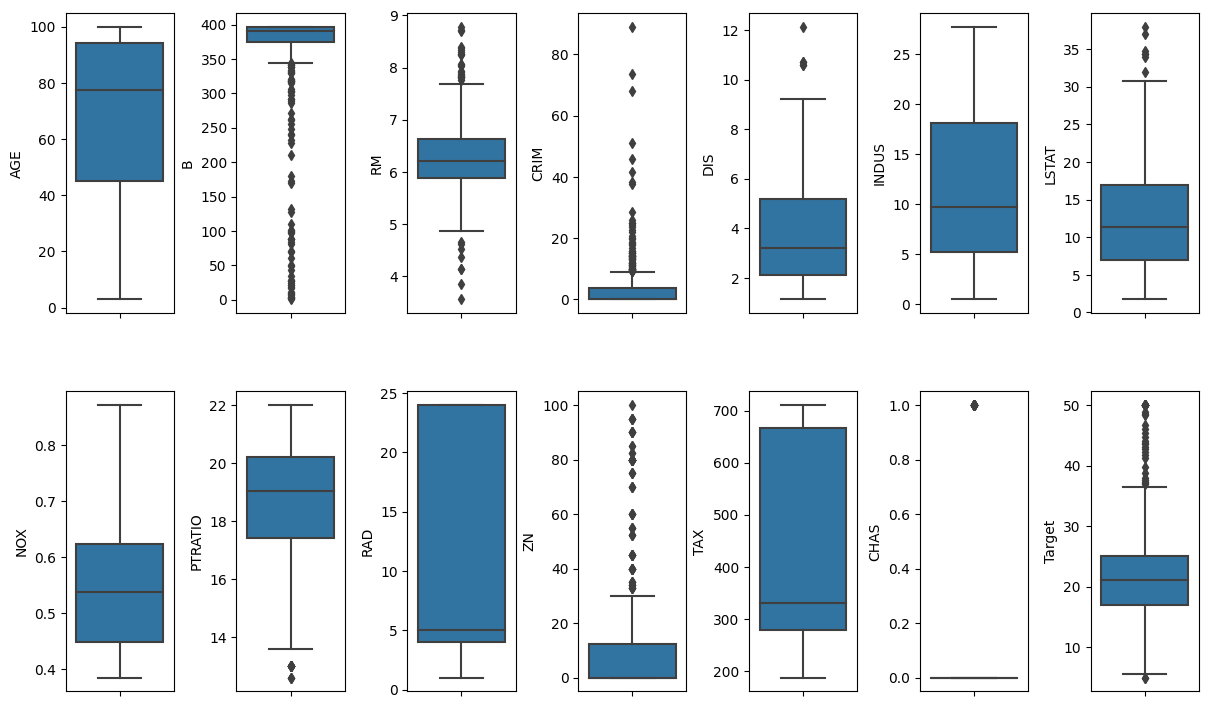

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 7))
axs = axs.flatten() # 2행, 7열을 1차원으로 펴서 for문 1개로 인덱싱할 수 있게 변환

index = 0
for column, data in df.items(): # 각각의 column과 data를 가져와서
    sns.boxplot(y=column, data=df, ax=axs[index]) # boxplot을 그려서 outlier를 시각적으로 확인
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
# 각 column별 outlier의 비율을 체크
for column, data in df.items():
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IRQ = Q3 - Q1
  selected_data = data[(data <= Q1 - 1.5 * IRQ) | (data >= Q3 + 1.5 * IRQ)] # 95% 내의 데이터만 추출
  percent = np.shape(selected_data)[0] * 100.0 / np.shape(df)[0] # 추출된 데이터 개수 / 전체 데이터 개수
  print("%s outliers = %.2f%%" % (column, percent))

AGE outliers = 0.00%
B outliers = 15.22%
RM outliers = 5.93%
CRIM outliers = 13.04%
DIS outliers = 0.99%
INDUS outliers = 0.00%
LSTAT outliers = 1.38%
NOX outliers = 0.00%
PTRATIO outliers = 2.96%
RAD outliers = 0.00%
ZN outliers = 13.44%
TAX outliers = 0.00%
CHAS outliers = 100.00%
Target outliers = 7.91%


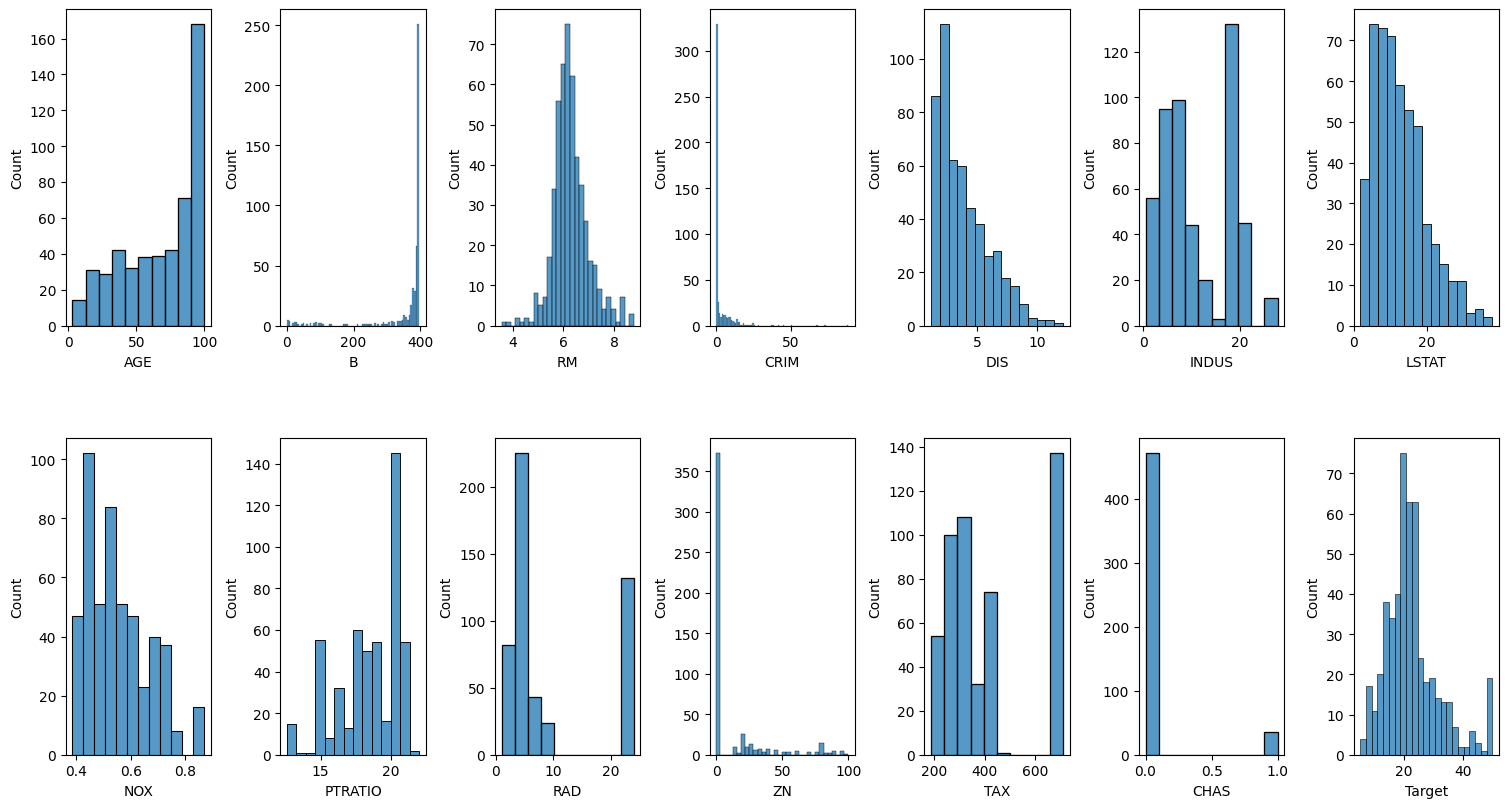

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 8))
index = 0
axs = axs.flatten()
for column, data in df.items():
    sns.histplot(data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

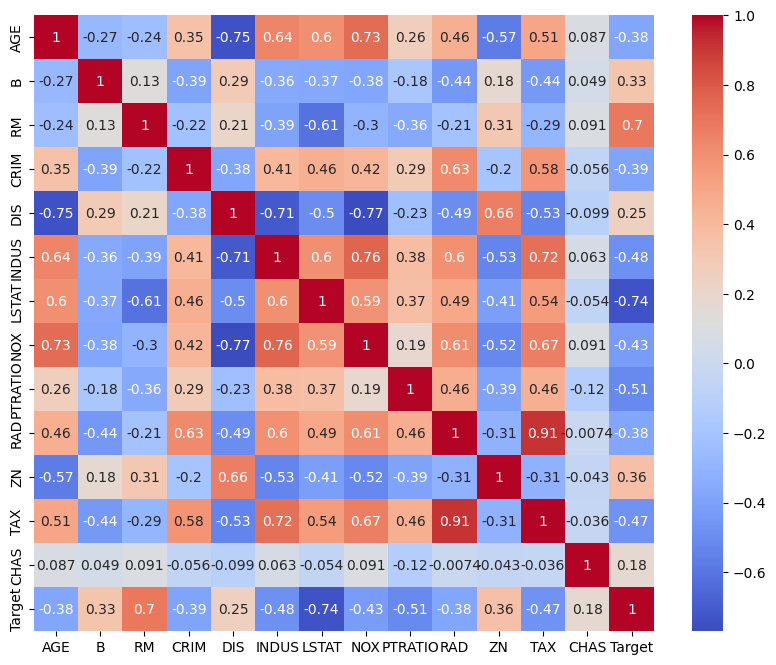

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

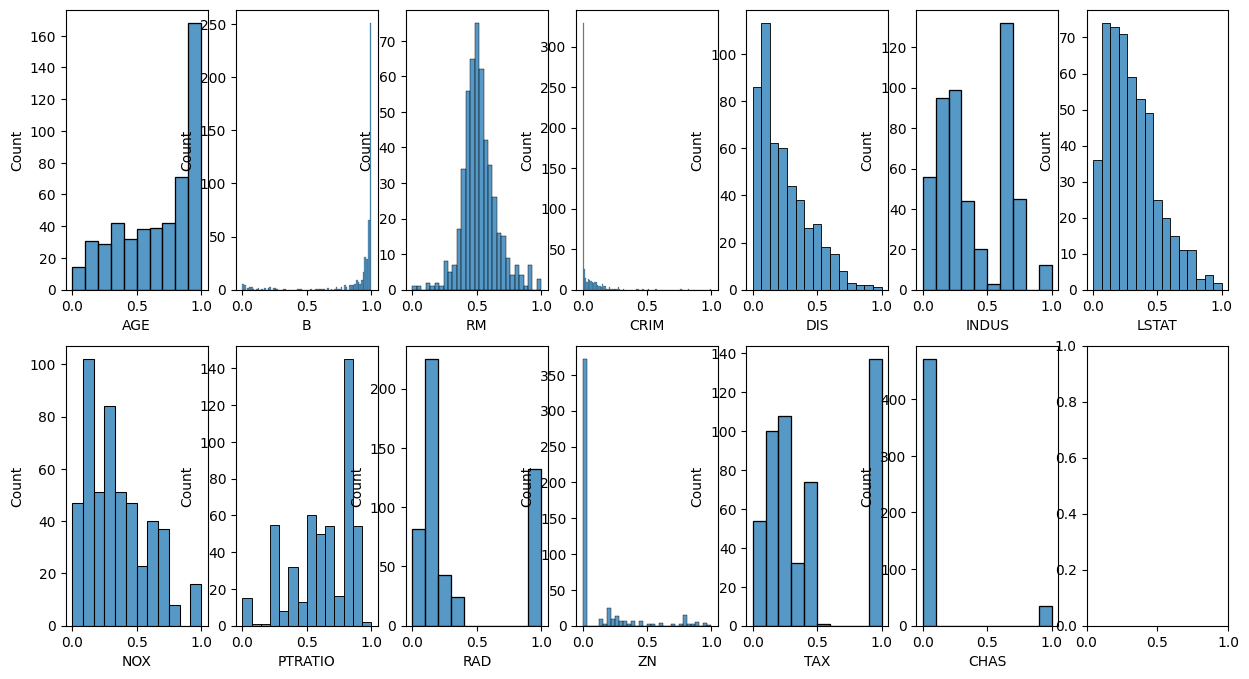

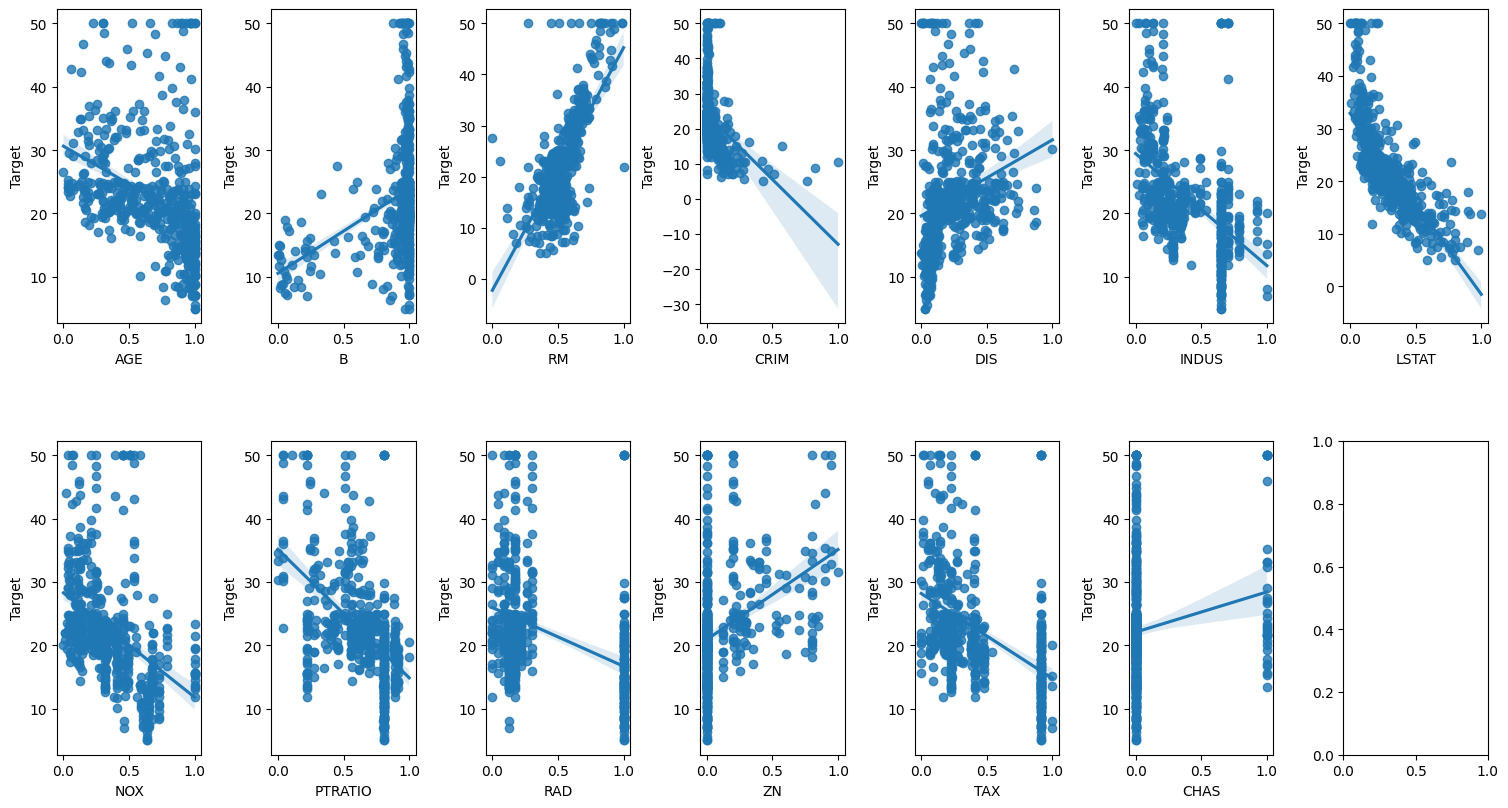

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = df.drop("Target", axis=1)
df_scaled = pd.DataFrame(data=scaler.fit_transform(x), columns=df.columns[:-1])

fig, axs1 = plt.subplots(ncols=7, nrows=2, figsize=(15, 8))
fig, axs2 = plt.subplots(ncols=7, nrows=2, figsize=(15, 8))
index = 0
axs1 = axs1.flatten()
axs2 = axs2.flatten()
for col, data in df_scaled.items():
  sns.histplot(data, ax=axs1[index])
  sns.regplot(y=df['Target'], x=data, ax=axs2[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
"""y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])"""

In [ ]:
dfX = df.drop("Target", axis=1)
dfy = df.Target